# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


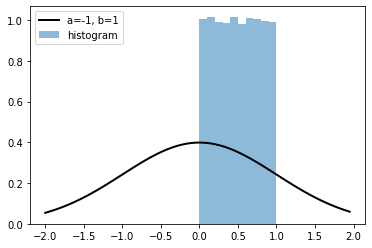

In [3]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


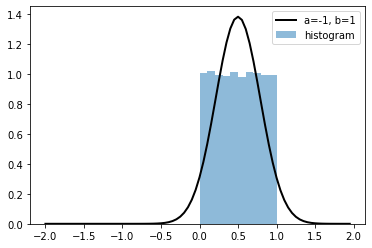

In [4]:
m = np.mean(data)
s = np.std(data)

t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, normed=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,m, s), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

In [11]:
m

0.49896639709714824

In [12]:
s

0.288787482637622

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

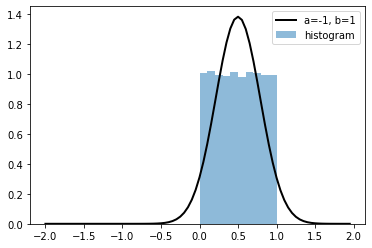

In [5]:
from scipy.stats import norm

mu, sigma = norm.fit(data)

t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [5]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [14]:
def lleq(arg):
    mu = arg[0]
    sigma = np.abs(arg[1])
    N = data.shape[0]
    return -N/2*np.log(2*np.pi) - N/2 * np.log(sigma**2) - np.sum((data-mu)**2)/(2*sigma**2)

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [10]:
print(lleq((0,1)))
print(lleq((0,2)))
print(lleq((1,1)))
print(lleq((0.5,0.2)))

-108512.13709848147
-165363.14232096536
-108615.49738876664
-35199.160155976715


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [6]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

         Current function value: 0.000100
         Iterations: 1
         Function evaluations: 20
         Gradient evaluations: 2
[ -1.01000000e+00  -7.52508635e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [17]:
mu, sigma = norm.fit(data)
mu, sigma

(0.49896639709714824, 0.288787482637622)

In [15]:
optimize.fmin_cg(lambda a: -lleq(a), [1, 1])

         Current function value: 17687.431763
         Iterations: 10
         Function evaluations: 97
         Gradient evaluations: 24


array([0.49896639, 0.28878747])

# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [28]:
def sn(x, m, s, t):
    s = np.abs(s)
    t = np.abs(t)
    
    res = np.zeros_like(x)
    c = np.sqrt(2 / np.pi) * 1 / (np.sqrt(s) * (1 + np.sqrt(t)))
    res[x <= m] = c * np.exp(- 1/(2*s)*(x[x <= m] - m) ** 2)
    res[x > m] = c * np.exp(- 1/(2*s*t)*(x[x > m] - m) ** 2)
    return res

print(sn(data, 0, 1, 1))
print(sn(data, 0, 1, 0.5))
print(sn(data, 1, 0.5, 1))

[0.39890761 0.32347784 0.3466583  ... 0.38044788 0.30243275 0.39594911]
[0.46730873 0.30728992 0.35290877 ... 0.42505936 0.26860672 0.46040282]
[0.21306207 0.49829747 0.45238724 ... 0.34956377 0.52846939 0.26132997]


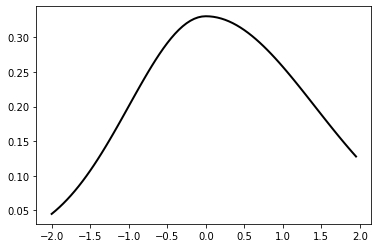

In [29]:
fig, ax = plt.subplots(1, 1)
ax.plot(t, sn(t ,0, 1, 2), 'k-', lw=2, label='a=-1, b=1')
plt.show()

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [40]:
def mle(arg):
    m, s, t = arg
    return np.sum(np.log(sn(data, m, s, t)))
    
print(mle((0, 1, 1)))

-108512.13709848146


# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [42]:
res = optimize.fmin_cg(lambda a: -mle(a), [0, 1, 1])

         Current function value: 17552.555880
         Iterations: 257
         Function evaluations: 3401
         Gradient evaluations: 678


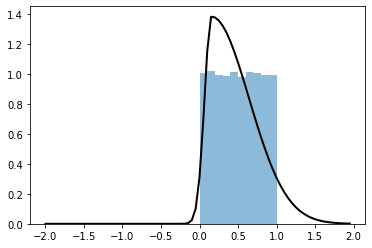

In [44]:
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.plot(t, sn(t, *res), 'k-', lw=2, label='a=-1, b=1')
plt.show()

# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [45]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

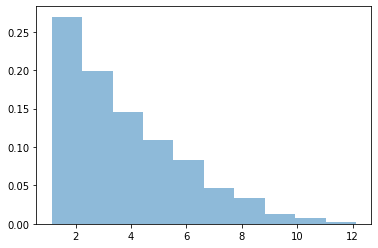

In [46]:
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
plt.show()

In [47]:
m, s = optimize.fmin_cg(lambda a: -lleq(a), [1, 1])


Optimization terminated successfully.
         Current function value: 1094.276701
         Iterations: 13
         Function evaluations: 127
         Gradient evaluations: 31


In [48]:
res = optimize.fmin_cg(lambda a: -mle(a), [0, 1, 1])

         Current function value: 984.728839
         Iterations: 596
         Function evaluations: 7727
         Gradient evaluations: 1543


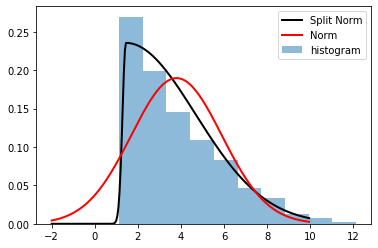

In [54]:
t = np.arange(-2, 10, 0.05)
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.plot(t, sn(t, *res), 'k-', lw=2, label='Split Norm')
ax.plot(t, stats.norm.pdf(t,m, s), 'r-', lw=2, label='Norm')
plt.legend()
plt.show()